In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
income_2018 = pd.read_csv("/Users/mauro/Downloads/income_restricted_2018.csv")
income_2020 = pd.read_csv("/Users/mauro/Downloads/income_restricted_2020.csv")
income_2021 = pd.read_csv("/Users/mauro/Downloads/income_restricted_2021.csv")
income_2022 = pd.read_csv("/Users/mauro/Downloads/income_restricted_2022.csv")
income_2022.drop("_id", axis=1, inplace=True)

In [36]:
def cleaning_zip(data):
    data.dropna(subset=["Zip Code"], inplace=True)
    data["Zip Code"] = data["Zip Code"].astype(int).astype(str)
    data["Zip Code"] = data["Zip Code"].str.zfill(5)

income_dfs = [income_2018, income_2020, income_2021, income_2022]

for df in income_dfs:
    cleaning_zip(df)

In [37]:
zip_codes = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]

def filter_zip_codes(df, zip_codes):
    return df[df["Zip Code"].isin(zip_codes)]

income_2018_zip, income_2020_zip, income_2021_zip, income_2022_zip = [filter_zip_codes(df, zip_codes) for df in income_dfs]

In [38]:
income_2018_zip.shape , income_2020_zip.shape, income_2021_zip.shape, income_2022_zip.shape

((759, 16), (805, 16), (830, 16), (843, 16))

In [39]:
def cleaning_data(df):
    df = df.copy()
    df.dropna(subset=df.columns[:-2], inplace=True)
    
    df.drop_duplicates(inplace=True)
    df.columns = df.columns.str.strip().str.replace(" Restricted", "Restricted")
    df.columns = df.columns.str.replace(" ", "_")
    
    columns = ["Total_Income-Restricted", "Income-Restricted_Rental", "Income-Restricted_Ownership"]
    
    for column in columns:
        df[column] = df[column].astype(float)
        
    return df

income_dfs_zip = [income_2018_zip, income_2020_zip, income_2021_zip, income_2022_zip]

income_2018_zip_cleaned, income_2020_zip_cleaned, income_2021_zip_cleaned, income_2022_zip_cleaned = [cleaning_data(df) for df in income_dfs_zip]

In [40]:
def map_neighborhood(x):
    if "Fenway" in x:
        return "Fenway"
    elif "Roxbury" in x:
        return "Roxbury"
    else:
        return x
    
def cleaning_neighborhood(df):
    df = df.copy()
    df.dropna(subset=["Neighborhood"], inplace=True)
    df["Neighborhood"] = df["Neighborhood"].apply(map_neighborhood)
    df["Neighborhood"] = df["Neighborhood"].str.lower().str.strip()
    df = df[df["Neighborhood"].isin(["roxbury", "dorchester", "fenway", "south end"])]
    return df

income_dfs_cleaned = [income_2018_zip_cleaned, income_2020_zip_cleaned, income_2021_zip_cleaned, income_2022_zip_cleaned]

income_2018_cleaned, income_2020_cleaned, income_2021_cleaned, income_2022_cleaned = [cleaning_neighborhood(df) for df in income_dfs_cleaned]

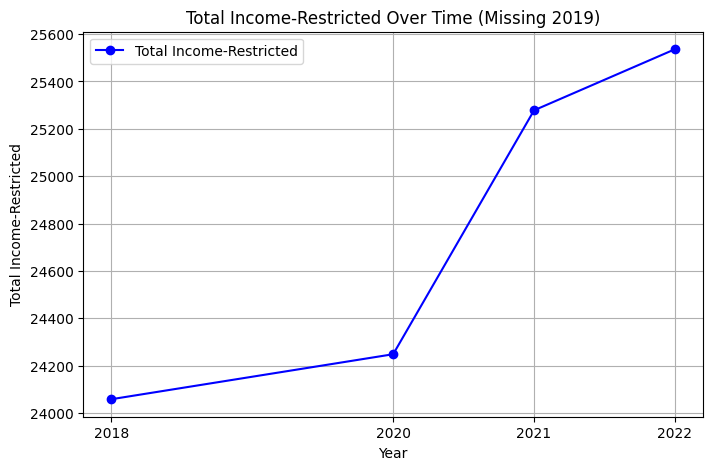

In [41]:
import matplotlib.pyplot as plt

totals = {
    2018: income_2018_cleaned["Total_Income-Restricted"].sum(),
    2020: income_2020_cleaned["Total_Income-Restricted"].sum(),
    2021: income_2021_cleaned["Total_Income-Restricted"].sum(),
    2022: income_2022_cleaned["Total_Income-Restricted"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(totals.keys()), list(totals.values()), marker="o", linestyle="-", color="b", label="Total Income-Restricted")

plt.title("Total Income-Restricted Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Income-Restricted")
plt.xticks(list(totals.keys())) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

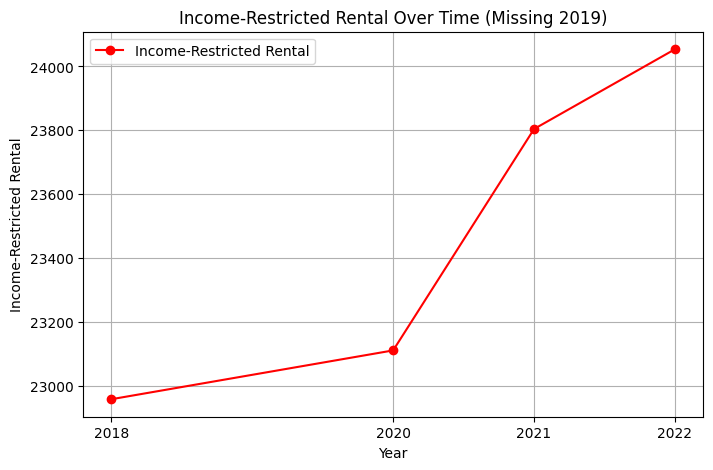

In [42]:
totals_rental = {
    2018: income_2018_cleaned["Income-Restricted_Rental"].sum(),
    2020: income_2020_cleaned["Income-Restricted_Rental"].sum(),
    2021: income_2021_cleaned["Income-Restricted_Rental"].sum(),
    2022: income_2022_cleaned["Income-Restricted_Rental"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(totals_rental.keys()), list(totals_rental.values()), marker="o", linestyle="-", color="r", label="Income-Restricted Rental")


plt.title("Income-Restricted Rental Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Income-Restricted Rental")
plt.xticks(list(totals_rental.keys())) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

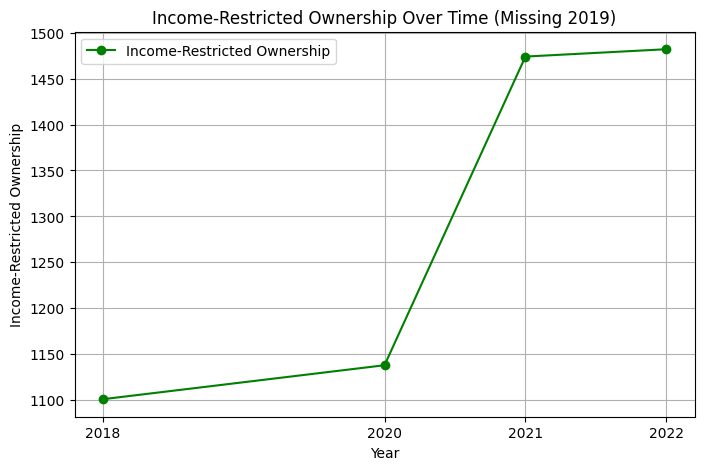

In [43]:
totals_ownership = {
    2018: income_2018_cleaned["Income-Restricted_Ownership"].sum(),
    2020: income_2020_cleaned["Income-Restricted_Ownership"].sum(),
    2021: income_2021_cleaned["Income-Restricted_Ownership"].sum(),
    2022: income_2022_cleaned["Income-Restricted_Ownership"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(totals_ownership.keys()), list(totals_ownership.values()), marker="o", linestyle="-", color="g", label="Income-Restricted Ownership")

plt.title("Income-Restricted Ownership Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Income-Restricted Ownership")
plt.xticks(list(totals_ownership.keys())) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

In [44]:
def cleaning_sector_8(df):
    df = df.copy()
    df["Section_8"] = df["Section_8"].map({np.nan: 0, "Y": 1, "MHP": 0})
    return df


income_dfs_cleaned = [income_2018_cleaned, income_2020_cleaned, income_2021_cleaned, income_2022_cleaned]
income_2018_final, income_2020_final, income_2021_final, income_2022_final = [cleaning_sector_8(df) for df in income_dfs_cleaned]
    

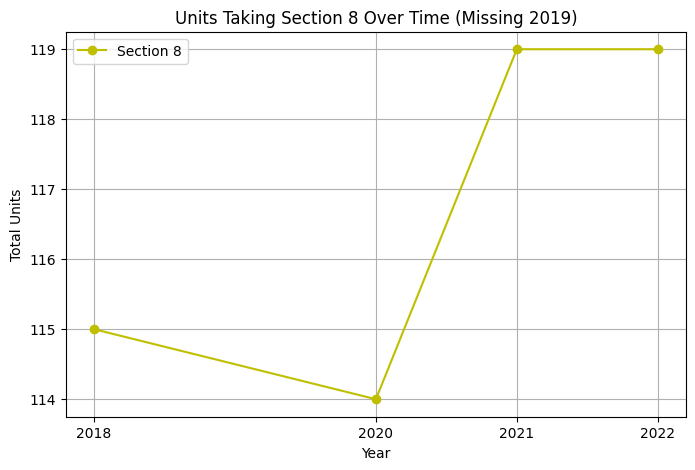

In [45]:
import matplotlib.pyplot as plt

section_8 = {
    2018: income_2018_final["Section_8"].sum(),
    2020: income_2020_final["Section_8"].sum(),
    2021: income_2021_final["Section_8"].sum(),
    2022: income_2022_final["Section_8"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(section_8.keys()), list(section_8.values()), marker="o", linestyle="-", color="y", label="Section 8")

plt.title("Units Taking Section 8 Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Units")
plt.xticks(list(section_8.keys())) 
plt.grid(True)
plt.legend()

plt.show()